In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# loading data
train_data = pd.read_csv('emnist-balanced-train.csv', header = None)
test_data = pd.read_csv('emnist-balanced-test.csv')
# print(train_data.shape)
# print(test_data.shape)

In [3]:
# update column names for both datasets
columns = ['labels']
for i in range(train_data.shape[1]-1):
    columns.append(i)
    
train_data.columns = columns
test_data.columns = columns

train_data.head()

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = train_data.loc[:, 0:]
y_train = train_data.loc[:, 'labels']
X_test = test_data.loc[:, 0:]
y_test = test_data.loc[:, 'labels']

In [5]:
def reshape_and_rotate(img):
    img = img.reshape(28, 28)
    img = np.fliplr(img)
    img = np.rot90(img)
    return img

In [6]:
X_train_reshaped = np.apply_along_axis(reshape_and_rotate, 1, X_train.values)
X_test_reshaped = np.apply_along_axis(reshape_and_rotate, 1, X_test.values)
# X_train_reshaped.shape
X_train_reshaped = X_train_reshaped / 255
X_test_reshaped = X_test_reshaped / 255

X_train_flattened = X_train_reshaped.reshape(len(X_train), 28*28)
X_test_flattened = X_test_reshaped.reshape(len(X_test), 28*28)

In [10]:
model = keras.Sequential([
    keras.layers.Dense(360, input_shape=(784,), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(47, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=15, validation_split=0.1)

Epoch 1/15
3173/3173 [==============================] - 31s 9ms/step - loss: 0.9301 - accuracy: 0.7191 - val_loss: 0.6208 - val_accuracy: 0.7948
Epoch 2/15
3173/3173 [==============================] - 30s 9ms/step - loss: 0.6049 - accuracy: 0.8021 - val_loss: 0.5502 - val_accuracy: 0.8161
Epoch 3/15
3173/3173 [==============================] - 27s 8ms/step - loss: 0.5304 - accuracy: 0.8216 - val_loss: 0.5193 - val_accuracy: 0.8226
Epoch 4/15
3173/3173 [==============================] - 33s 10ms/step - loss: 0.4845 - accuracy: 0.8348 - val_loss: 0.4942 - val_accuracy: 0.8319
Epoch 5/15
3173/3173 [==============================] - 32s 10ms/step - loss: 0.4519 - accuracy: 0.8429 - val_loss: 0.4779 - val_accuracy: 0.8345
Epoch 6/15
3173/3173 [==============================] - 32s 10ms/step - loss: 0.4260 - accuracy: 0.8489 - val_loss: 0.4918 - val_accuracy: 0.8387
Epoch 7/15
3173/3173 [==============================] - 23s 7ms/step - loss: 0.4080 - accuracy: 0.8557 - val_loss: 0.4723 - val

In [11]:
# accuracy score
model.evaluate(X_test_flattened,y_test)

588/588 [==============================] - 2s 3ms/step - loss: 0.4920 - accuracy: 0.8494


[0.4920395016670227, 0.849406898021698]

Text(141.0, 0.5, 'Truth')

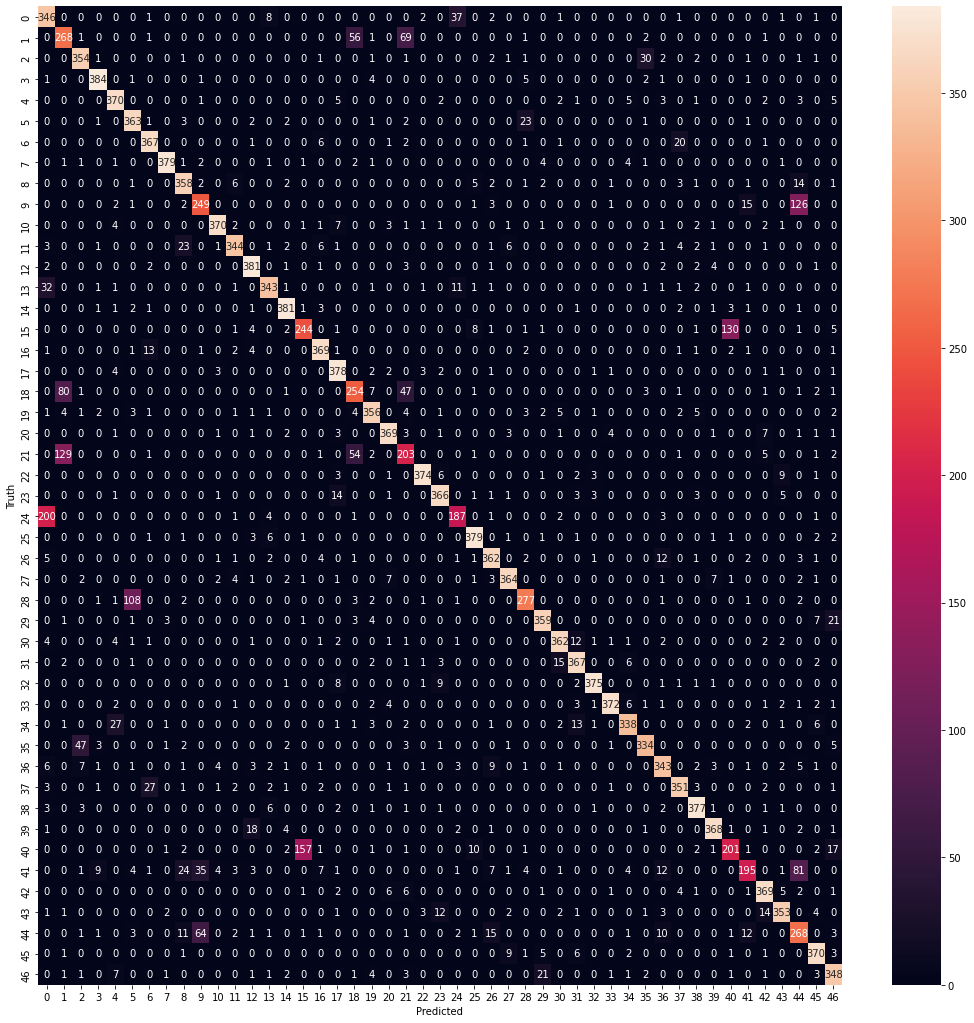

In [12]:
# evaluating and prediction by the model
y_predicted = model.predict(X_test_flattened)

y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (18,18))
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')